<a href="https://colab.research.google.com/github/yangshuxuan/traceanalyze/blob/master/random_generate_trace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 引言
模拟GPS采样，GPS定位本身有噪声，但是受制于环境等影响，有时噪声很大，即产生轨迹毛刺点。

# 引入需要用到的库

Next, import the libraries that we will use.

In [19]:
import numpy as np
import pandas as pd

# 设置随机种子
结果可重现

In [21]:
np.random.seed(0)

# 生成正常的轨迹点间隔值
这里假设飞机以800Km/h的速度巡航，每分钟定位一次，因此每分钟的纬度和经度的各自增加大概为0.1。

In [22]:
normalMu, normalSigma = 0.1, 0.1 # 经纬度增量平均值和标准方差
normalSampleNum = 500 #样本数
normalIntervalSample = np.random.normal(normalMu, normalSigma, (normalSampleNum,2)) #同时生成经度和纬度的增量，因此是2

# 设置轨迹起点
纬度在前，经度在后

In [23]:
startPoint=[31.23, 121.47] #此处是China ShangHai

# 生成正常轨迹
此处沿axix=0累加，然后都加上起点的经纬度

In [24]:
normalSample = normalIntervalSample.cumsum(0) + np.array(startPoint).reshape((1,2))

# 生成异常轨迹点间隔值
类似于正常轨迹点间隔值的生成，但是方差较大，并且需要指定毛刺点的占比。

In [25]:
abnormalMu, abnormalSigma = 0.1, 10.0 # mean and standard deviation
abnormalSamplePercent = 0.01 #毛刺点在总体的占比
abnormalSampleNum = int(normalSampleNum *  abnormalSamplePercent)
abnormalIntervalSample = np.random.normal(abnormalMu, abnormalSigma, (abnormalSampleNum,2))

# 选择需要替换为毛刺点的正常轨迹的索引

In [26]:
normalSampleIndexArr = np.arange(1,normalSampleNum) #默认起点不是毛刺点，因此从1开始采样
np.random.shuffle(normalSampleIndexArr) #随机打乱


# 将部分正常点替换为毛刺点

In [27]:
normalSample[normalSampleIndexArr[0:abnormalSampleNum]] = normalSample[normalSampleIndexArr[0:abnormalSampleNum]-1]+abnormalIntervalSample

# 转成DataFrame并画图展示

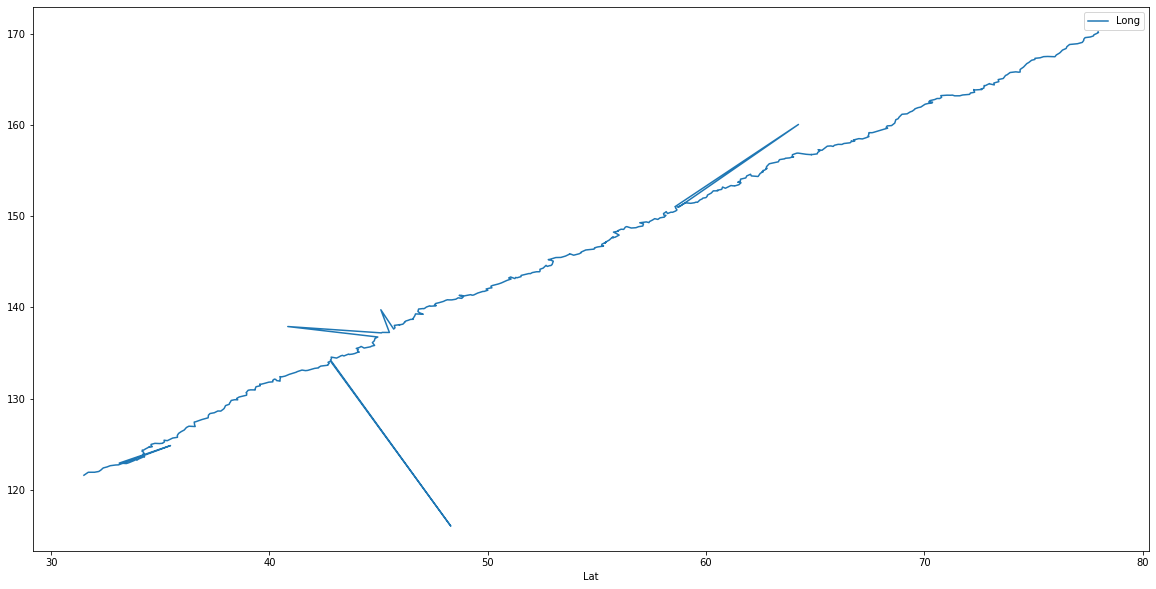

In [30]:
df = pd.DataFrame(normalSample,columns=['Lat', 'Long'])
df.plot.line(x = 'Lat', y = 'Long',figsize=(20,10))